**Handling Imbalanced datasets**    
There are 4 commonly used methods for handling imbalanced datasets   
**Sampling methods for handling imbalance datasets**
1. Downsampling (Under sampling)
2. Upsampling (Over sampling)
3. Upweighting
4. Combination of over- and under-sampling

1.**Downsampling(Under sampling):**  
 In this the classes are balanced by performing resampling on majority class. It reduces the size of majority class in order to match with the size of the minority class.
 There are different methods to perform this sampling. one of those method is Random Under sampler, which selectes a subset of data randomly to balance the data in target classes.

2.**Upsampling (Over sampling):**
  This method is used when there is an insufficient data. In this the resampling performed on minority class. It increases the size of the minority class in order to match with the size   of the majority class.One best example of this sampling is SMOTE (Synthetic minority over sampling Technique).It works by creating synthetic samples from the minor class to balance the   data in target classes.
  
3.**Upweighting:**
  Here the classes are balanced by scaling the weight of minority class. This weight is scaled by taking the ratio of number of samples in majority class to the number of samples in       minority class. A minority class weight of 30 (say) means the model treats the minority class as 30 times as important as it would majority class of weight 1. 
  
 Generally these 3 methods are most widely used to handle imbalanced data in building ML models. For DL models there is a separate batch generator to handle highly imbalanced data.
 
 For more details about sampling methods, please check below link,  
 https://imbalanced-learn.readthedocs.io/en/stable/api.html#module-imblearn.over_sampling
 

In [1]:
#Import required libraries
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/talkingdata-adtracking-fraud-detection/train.csv
/kaggle/input/talkingdata-adtracking-fraud-detection/test_supplement.csv
/kaggle/input/talkingdata-adtracking-fraud-detection/sample_submission.csv
/kaggle/input/talkingdata-adtracking-fraud-detection/train_sample.csv
/kaggle/input/talkingdata-adtracking-fraud-detection/test.csv


In [2]:
df=pd.read_csv('../input/talkingdata-adtracking-fraud-detection/train_sample.csv')
df.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,29540,3,1,42,489,2017-11-08 03:57:46,NaN,0
1,26777,11,1,25,319,2017-11-09 11:02:14,NaN,0
2,140926,12,1,13,140,2017-11-07 04:36:14,NaN,0
3,69375,2,1,19,377,2017-11-09 13:17:20,NaN,0
4,119166,9,2,15,445,2017-11-07 12:11:37,NaN,0


In [3]:
#convert timestamp to datatime
def todatetime(df):
    df['click_time']=pd.to_datetime(df['click_time'])
    df['click_hour']=df['click_time'].dt.hour
    df['click_day']=df['click_time'].dt.day
    df['click_weekday']=df['click_time'].dt.weekday
    df['click_month']=df['click_time'].dt.month
    df['click_year']=df['click_time'].dt.year
    return df

In [4]:
df=todatetime(df)

In [5]:
df=df.drop(['click_time'],axis=1)

In [6]:
df.head()

,ip,app,device,os,channel,attributed_time,is_attributed,click_hour,click_day,click_weekday,click_month,click_year
0,29540,3,1,42,489,NaN,0,3,8,2,11,2017
1,26777,11,1,25,319,NaN,0,11,9,3,11,2017
2,140926,12,1,13,140,NaN,0,4,7,1,11,2017
3,69375,2,1,19,377,NaN,0,13,9,3,11,2017
4,119166,9,2,15,445,NaN,0,12,7,1,11,2017


In [7]:
df.isnull().sum()

ip                     0
app                    0
device                 0
os                     0
channel                0
attributed_time    99749
is_attributed          0
click_hour             0
click_day              0
click_weekday          0
click_month            0
click_year             0
dtype: int64

In [8]:
df=df.drop('attributed_time',axis=1)

In [9]:
#Shuffling observations
df=df.sample(frac=1)
df

,ip,app,device,os,channel,is_attributed,click_hour,click_day,click_weekday,click_month,click_year
86366,199348,9,1,19,466,0,15,9,3,11,2017
74189,58614,18,1,3,107,0,2,7,1,11,2017
10832,30614,3,2,6,280,0,7,8,2,11,2017
14257,111159,1,1,19,134,0,11,8,2,11,2017
77911,77257,14,1,19,467,0,14,8,2,11,2017
...,...,...,...,...,...,...,...,...,...,...,...
44592,15643,9,1,13,244,0,1,7,1,11,2017
61798,8199,15,1,20,245,0,17,6,0,11,2017
73653,107379,12,1,18,105,0,12,8,2,11,2017
75422,59159,1,1,6,134,0,16,6,0,11,2017


**Distribution of classes in train dataset before sampling**

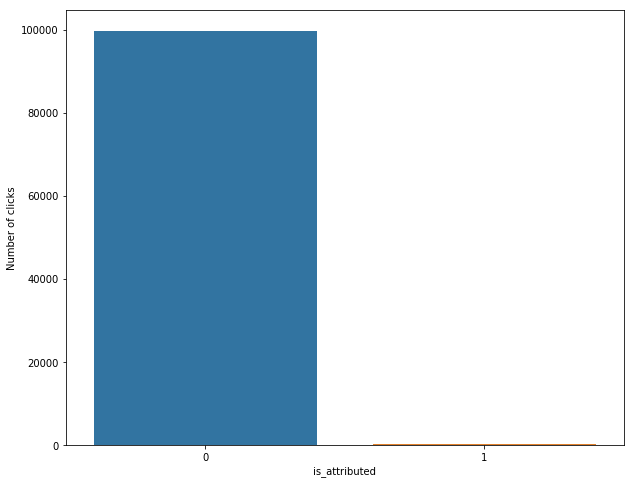

In [10]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sn.countplot(x='is_attributed',data=df)
plt.ylabel('Number of clicks')
plt.show()

**Classes:**  
0- User will not download an app after clicking a mobile app advertisement    
1- User will download an app after clicking a mobile app advertisement

In [11]:
df['is_attributed'].value_counts()

0    99749
1      251
Name: is_attributed, dtype: int64

The target label data is highly imbalanced (99.75:0.25)%. This needs to be balanced to make the model to be generalize well.

In [12]:
target_label=df['is_attributed']
target_label.shape

(100000,)

In [13]:
ones=df[df['is_attributed']==1]
zeros=df[df['is_attributed']==0]

In [14]:
df=df.drop(['is_attributed','ip'],axis=1)

**Split the dataset into train & test sets**

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,target_label,test_size=0.2,random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(80000, 9) (80000,)
(20000, 9) (20000,)


**Create validation dataset from train dataset**

In [16]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.1,random_state=42)
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)

(72000, 9) (72000,)
(8000, 9) (8000,)


**Building LGBM model**

In [17]:
import lightgbm as lgb
#load datasets in lgb formate
train_data=lgb.Dataset(x_train,label=y_train,free_raw_data=False)
validation_data=lgb.Dataset(x_val,label=y_val,free_raw_data=False)

**LGBM basemodel**

In [18]:
#set parameters for training
params={ 'num_leaves':160,
        'object':'binary',
        'metric':['auc','binary_logloss']
       }

In [19]:

#Original LGB model before sampling
num_round=100
def lgb_basemodel(x_train,y_train):
    lgb_model=lgb.train(params,train_data,num_round,valid_sets=validation_data,early_stopping_rounds=20)
    return lgb_model

**LGBM model with Downsampling**

In [20]:
#LGBM model after resampling the data using Under sampling techniques
from imblearn.under_sampling import RandomUnderSampler 
def lgb_downsampling(x_train,y_train):
    lgb_enn=RandomUnderSampler(random_state=42)
    x_resample,y_resample=lgb_enn.fit_resample(x_train,y_train)
    train_data=lgb.Dataset(x_resample,label=y_resample,free_raw_data=False)
    lgb_model=lgb.train(params,train_data,num_round,valid_sets=validation_data,early_stopping_rounds=20)
    return lgb_model,x_resample,y_resample;

Using TensorFlow backend.


**LGBM model with Upsampling**

In [21]:
#LGBM model after resampling the data using Up sampling techniques
from imblearn.over_sampling import SMOTE  #Balances the classes by performing upsampling on minority class
def lgb_upsampling(x_train,y_train):
    lgb_smote= SMOTE(random_state=42)
    x_resample,y_resample=lgb_smote.fit_resample(x_train,y_train)
    train_data=lgb.Dataset(x_resample,label=y_resample)
    lgb_model=lgb.train(params,train_data,num_round,valid_sets=validation_data,early_stopping_rounds=20)
    return lgb_model,x_resample,y_resample;

**LGBM model with Upweighting**

In [22]:
weight_factor=zeros.shape[0]/ones.shape[0]  # Ratio of number of samples in majority class to number of samples in minority class
print('Weight factor is %0.2f'%(weight_factor))

Weight factor is 397.41


In [23]:
#set parameters for training
params1={ 'num_leaves':160,
        'object':'binary',
        'metric':['auc','binary_logloss'],
        'scale_pos_weight':397.41                 #Weight of minority class
       }

In [24]:
#LGBM model using Upweighting technique for handling the imbalanced data
def lgb_Upweighting(x_train,y_train):
    lgb_model=lgb.train(params1,train_data,num_round,valid_sets=validation_data,early_stopping_rounds=20)
    return lgb_model;

**Train the LGBM models**

In [25]:
#Basemodel
lgb_basemodel=lgb_basemodel(x_train,y_train)

[1]	valid_0's auc: 0.810517	valid_0's binary_logloss: 0.0133975
Training until validation scores don't improve for 20 rounds
[2]	valid_0's auc: 0.802399	valid_0's binary_logloss: 0.0126188
[3]	valid_0's auc: 0.788214	valid_0's binary_logloss: 0.0121738
[4]	valid_0's auc: 0.816347	valid_0's binary_logloss: 0.0115731
[5]	valid_0's auc: 0.813471	valid_0's binary_logloss: 0.0111074
[6]	valid_0's auc: 0.817135	valid_0's binary_logloss: 0.0108448
[7]	valid_0's auc: 0.815348	valid_0's binary_logloss: 0.011121
[8]	valid_0's auc: 0.814062	valid_0's binary_logloss: 0.0140231
[9]	valid_0's auc: 0.762611	valid_0's binary_logloss: 0.0143373
[10]	valid_0's auc: 0.777828	valid_0's binary_logloss: 0.0174235
[11]	valid_0's auc: 0.780848	valid_0's binary_logloss: 0.017359
[12]	valid_0's auc: 0.781788	valid_0's binary_logloss: 0.0173266
[13]	valid_0's auc: 0.787185	valid_0's binary_logloss: 0.0172859
[14]	valid_0's auc: 0.78214	valid_0's binary_logloss: 0.0172759
[15]	valid_0's auc: 0.772275	valid_0's bi

In [26]:
#Downsampling model
lgb_downsampling,x_down,y_down=lgb_downsampling(x_train,y_train)

[1]	valid_0's auc: 0.884565	valid_0's binary_logloss: 0.637798
Training until validation scores don't improve for 20 rounds
[2]	valid_0's auc: 0.87159	valid_0's binary_logloss: 0.592268
[3]	valid_0's auc: 0.870419	valid_0's binary_logloss: 0.553912
[4]	valid_0's auc: 0.873146	valid_0's binary_logloss: 0.522069
[5]	valid_0's auc: 0.871962	valid_0's binary_logloss: 0.493478
[6]	valid_0's auc: 0.873344	valid_0's binary_logloss: 0.471355
[7]	valid_0's auc: 0.882843	valid_0's binary_logloss: 0.449876
[8]	valid_0's auc: 0.892066	valid_0's binary_logloss: 0.432155
[9]	valid_0's auc: 0.889326	valid_0's binary_logloss: 0.417134
[10]	valid_0's auc: 0.892416	valid_0's binary_logloss: 0.401418
[11]	valid_0's auc: 0.900481	valid_0's binary_logloss: 0.389628
[12]	valid_0's auc: 0.900936	valid_0's binary_logloss: 0.378584
[13]	valid_0's auc: 0.903092	valid_0's binary_logloss: 0.369635
[14]	valid_0's auc: 0.903257	valid_0's binary_logloss: 0.361439
[15]	valid_0's auc: 0.903669	valid_0's binary_logloss

In [27]:
y_down_df=pd.DataFrame(y_down)
y_down.shape

(376,)

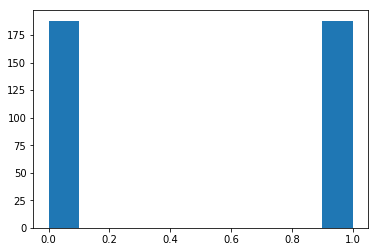

In [28]:
plt.hist(y_down);

In [29]:
#Upsampling model
lgb_upsampling,x_up,y_up=lgb_upsampling(x_train,y_train)

[1]	valid_0's auc: 0.841627	valid_0's binary_logloss: 0.603481
Training until validation scores don't improve for 20 rounds
[2]	valid_0's auc: 0.841475	valid_0's binary_logloss: 0.529391
[3]	valid_0's auc: 0.843968	valid_0's binary_logloss: 0.467648
[4]	valid_0's auc: 0.843118	valid_0's binary_logloss: 0.415234
[5]	valid_0's auc: 0.841789	valid_0's binary_logloss: 0.370347
[6]	valid_0's auc: 0.858757	valid_0's binary_logloss: 0.332082
[7]	valid_0's auc: 0.843292	valid_0's binary_logloss: 0.298684
[8]	valid_0's auc: 0.843101	valid_0's binary_logloss: 0.269825
[9]	valid_0's auc: 0.845274	valid_0's binary_logloss: 0.244466
[10]	valid_0's auc: 0.845676	valid_0's binary_logloss: 0.222325
[11]	valid_0's auc: 0.845037	valid_0's binary_logloss: 0.202815
[12]	valid_0's auc: 0.846006	valid_0's binary_logloss: 0.185424
[13]	valid_0's auc: 0.848195	valid_0's binary_logloss: 0.170089
[14]	valid_0's auc: 0.845168	valid_0's binary_logloss: 0.156671
[15]	valid_0's auc: 0.846151	valid_0's binary_loglos

In [30]:
y_up_df=pd.DataFrame(y_up)
y_up.shape

(143624,)

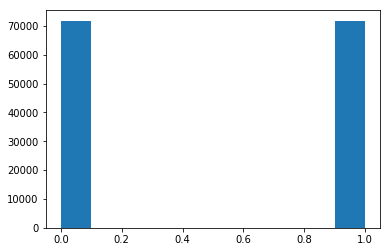

In [31]:
plt.hist(y_up);

In [32]:
#Upweighting model 
lgb_upweighting=lgb_Upweighting(x_train,y_train);

[1]	valid_0's auc: 0.810517	valid_0's binary_logloss: 0.0133975
Training until validation scores don't improve for 20 rounds
[2]	valid_0's auc: 0.802399	valid_0's binary_logloss: 0.0126188
[3]	valid_0's auc: 0.788214	valid_0's binary_logloss: 0.0121738
[4]	valid_0's auc: 0.816347	valid_0's binary_logloss: 0.0115731
[5]	valid_0's auc: 0.813471	valid_0's binary_logloss: 0.0111074
[6]	valid_0's auc: 0.817135	valid_0's binary_logloss: 0.0108448
[7]	valid_0's auc: 0.815348	valid_0's binary_logloss: 0.011121
[8]	valid_0's auc: 0.814062	valid_0's binary_logloss: 0.0140231
[9]	valid_0's auc: 0.762611	valid_0's binary_logloss: 0.0143373
[10]	valid_0's auc: 0.777828	valid_0's binary_logloss: 0.0174235
[11]	valid_0's auc: 0.780848	valid_0's binary_logloss: 0.017359
[12]	valid_0's auc: 0.781788	valid_0's binary_logloss: 0.0173266
[13]	valid_0's auc: 0.787185	valid_0's binary_logloss: 0.0172859
[14]	valid_0's auc: 0.78214	valid_0's binary_logloss: 0.0172759
[15]	valid_0's auc: 0.772275	valid_0's bi

**Testing models on unseen dataset**

In [33]:
#Basemodel
y_base=lgb_basemodel.predict(x_test)

In [34]:
#Upsampling
y_upsampling=lgb_upsampling.predict(x_test)

In [35]:
#Downsampling
y_downsampling=lgb_downsampling.predict(x_test)

In [36]:
#Upweighting
y_upweighting=lgb_upweighting.predict(x_test)

**Plot confusion matrix for all Logistic models**

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import scikitplot as skplt

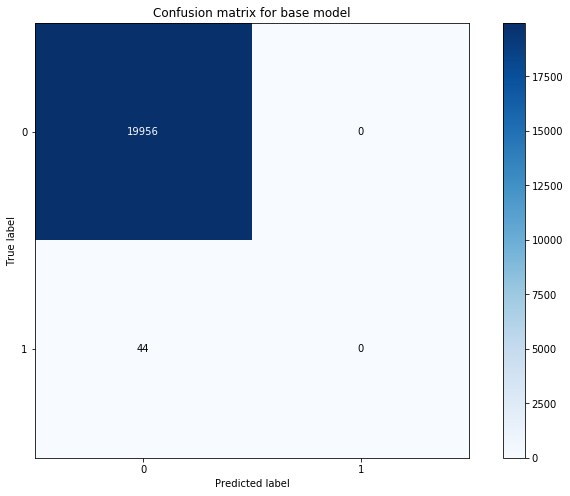

In [38]:
#Basemodel
skplt.metrics.plot_confusion_matrix(y_test,y_base>0.5,normalize=False,figsize=(12,8),title='Confusion matrix for base model')  
plt.show()

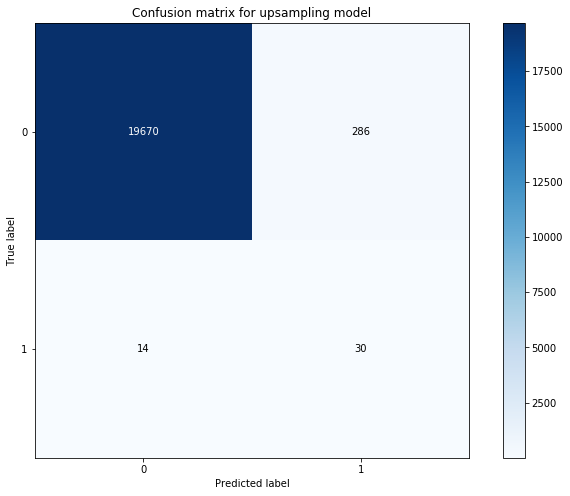

In [39]:
#Upsampling
skplt.metrics.plot_confusion_matrix(y_test,y_upsampling>0.5,normalize=False,figsize=(12,8),title='Confusion matrix for upsampling model')  #0.5 is threshold value
plt.show()

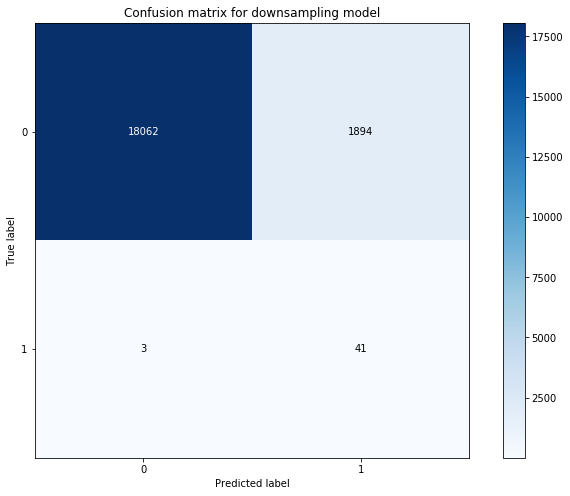

In [40]:
#downsampling
skplt.metrics.plot_confusion_matrix(y_test,y_downsampling>0.5,normalize=False,figsize=(12,8),title='Confusion matrix for downsampling model')  #0.5 is threshold value
plt.show()

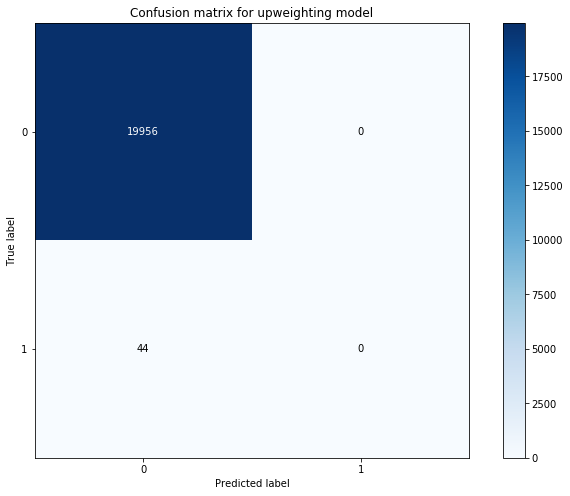

In [41]:
#Upweighting
skplt.metrics.plot_confusion_matrix(y_test,y_upweighting>0.5,normalize=False,figsize=(12,8),title='Confusion matrix for upweighting model')  #0.5 is threshold value
plt.show()

**Classification report for all Logistic models**

In [42]:
#Base model
cm_base=classification_report(y_test,y_base>0.5)
print(cm_base)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19956
           1       0.00      0.00      0.00        44

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       1.00      1.00      1.00     20000



In [43]:
#Upsampling model
cm_up=classification_report(y_test,y_upsampling>0.5)
print(cm_up)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     19956
           1       0.09      0.68      0.17        44

    accuracy                           0.98     20000
   macro avg       0.55      0.83      0.58     20000
weighted avg       1.00      0.98      0.99     20000



In [44]:
#Downsampling model
cm_up=classification_report(y_test,y_downsampling>0.5)
print(cm_up)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     19956
           1       0.02      0.93      0.04        44

    accuracy                           0.91     20000
   macro avg       0.51      0.92      0.50     20000
weighted avg       1.00      0.91      0.95     20000



In [45]:
#Upweighting model
cm_upweight=classification_report(y_test,y_upweighting>0.5)  # 0.5 is threshold value
print(cm_upweight)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19956
           1       0.00      0.00      0.00        44

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       1.00      1.00      1.00     20000



**Conclusions:-**

1. Both LGB base & upweighting models are performing same. These models are not at all learning positive labels, so always predicting negative class.
2. LGB Upsampling (SMOTE) permormed well among all models. This model performance can be improved further by hypermeter tuning
3. LGB downsampling model performing reasonally but not good.

All above models are data dependent, so they may perform well on some datasets but not all. It is better to build all models & choose best among for prediction.
For large datasets, Ensemble methods can be employed, but these are computationally expensive. Also it is good to check all other sampling methods along with SMOTE & RandomUnderSampler for better understanding of models to handle unbalanced datasets.